# Laboratorium 05
## Aproksymacja
Iga Antonik, Helena Szczepanowska

# Zadanie 1
Wykonaj aproksymację średniokwadratową punktową populacji Stanów Zjednoczonych w przedziale [1900,1980] wielomianami stopnia m dla 0 ≤ m ≤ 6.
- (a) Dla każdego m dokonaj ekstrapolacji wielomianu do roku 1990. Porównaj otrzymaną wartość z prawdziwą wartością dla roku 1990, wynoszącą 248 709 873. Ile wynosi błąd względny ekstrapolacji dla roku 1990? Dla jakiego m błąd względny był najmniejszy?

- (b) Zbyt niski stopień wielomianu oznacza, że model nie jest w stanie uwzględnić zmienności danych (duże obciążenie). Zbyt wysoki stopień wielomianu oznacza z kolei, że model uwzględnia szum lub błędy danych (duża wariancja), co w szczególności obserwowaliśmy w przypadku interpolacji. Wielomian stopnia m posiada k = m + 1 parameterów. Stopień wielomianu, m, jest hiperparametrem modelu. Do wyboru optymalnego stopnia wielomianu można posłużyć się kryterium informacyjnym Akaikego (ang. Akaike information criterion):
 $$ AIC= 2k+nln(\sum_{i=1}^{n} \frac{(y_i - p(x_i))^2}{n}) $$ 
gdzie y_i (i = 1, . . . , n) oznacza prawdziwą liczbę osób w roku x_i, natomiast p(x_i) liczbę osób przewidywaną przez model, tzn wartość wielomianu p(x).
Ponieważ rozmiar próbki jest niewielki (dane z dziewięciu lat, n = 9), n/k < 40, należy użyć wzoru ze składnikiem korygującym:
$$ AICc = AIC + \frac{2k(k+1)}{n−k−1} $$
Mniejsze wartości kryterium oznaczają lepszy model. Czy wyznaczony w ten sposób stopień m, odpowiadający najmniejszej wartości AICc, pokrywa się z wartością z poprzedniego podpunktu?

## Rozwiązanie

### Biblioteki

In [8]:
import numpy as np
import matplotlib.pyplot as plt

### Dane populacyjne

In [9]:
years = np.array([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980])
population = np.array([76212168, 92228496, 106021537, 123202624, 132164569, 151325798, 179323175, 203302031, 226542199])
year_1990_true = 248709873 

### Stopienie wielomianu aproksymującego

In [10]:
m_values = np.arange(7)

### Obliczanie macierzy S i wektora T

![alt text](./img/ST.png)

In [11]:
def calculate_S(years, m):
    n = len(years)
    S = np.zeros((m+1, m+1))
    for i in range(m+1):
        for j in range(m+1):
            S[i][j] = np.sum(years ** (i+j))
    return S

def calculate_T(years, population, m):
    n = len(years)
    T = np.zeros(m+1)
    for i in range(m+1):
        T[i] = np.sum(years ** i * population)
    return T

### Rozwiązanie układu równań i wyznaczenie funkcji

![alt text](./img/uklad.png)

In [12]:
def solve_equations(S, T):
    coefficients = np.linalg.solve(S, T)
    return coefficients


def p(coefficients,x):
    return np.sum(coefficients*(x**np.arange(len(coefficients))))

### Ekstrapolacja do roku 1990

In [13]:
def extrapolate_to_1990(coefficients, year):
    return p(coefficients,year)

### Obliczenia dla kazdego m

In [14]:
S = []
T = []
coefficients = []
population_1990_approx =[]
relative_error_1990 =[]
y_values = []

for m in m_values:
    S.append(calculate_S(years, m))
    T.append(calculate_T(years, population, m))
    coefficients.append(solve_equations(S[m], T[m]))
    population_1990_approx.append(extrapolate_to_1990(coefficients[m], 1990))

    # Obliczenie błędu względnego ekstrapolacji
    relative_error_1990.append(np.abs(population_1990_approx[m] - year_1990_true) / year_1990_true * 100)
    print("Wynik ekstrapolacji populacji w roku 1990 (przybliżony) dla m = ", m," : ", round(population_1990_approx[m],2))
    print("Błąd względny ekstrapolacji dla roku 1990: ", round(relative_error_1990[m],2),"% \n")
    y_values.append([p(coefficients[m],year) for year in years] )

Wynik ekstrapolacji populacji w roku 1990 (przybliżony) dla m =  0  :  143369177.44
Błąd względny ekstrapolacji dla roku 1990:  42.35 % 

Wynik ekstrapolacji populacji w roku 1990 (przybliżony) dla m =  1  :  235808109.03
Błąd względny ekstrapolacji dla roku 1990:  5.19 % 

Wynik ekstrapolacji populacji w roku 1990 (przybliżony) dla m =  2  :  254712944.65
Błąd względny ekstrapolacji dla roku 1990:  2.41 % 

Wynik ekstrapolacji populacji w roku 1990 (przybliżony) dla m =  3  :  254715483.19
Błąd względny ekstrapolacji dla roku 1990:  2.41 % 

Wynik ekstrapolacji populacji w roku 1990 (przybliżony) dla m =  4  :  236154819.21
Błąd względny ekstrapolacji dla roku 1990:  5.05 % 

Wynik ekstrapolacji populacji w roku 1990 (przybliżony) dla m =  5  :  158239299.36
Błąd względny ekstrapolacji dla roku 1990:  36.38 % 

Wynik ekstrapolacji populacji w roku 1990 (przybliżony) dla m =  6  :  -2.0345135030630925e+17
Błąd względny ekstrapolacji dla roku 1990:  81802683625.28 % 



### Wykres

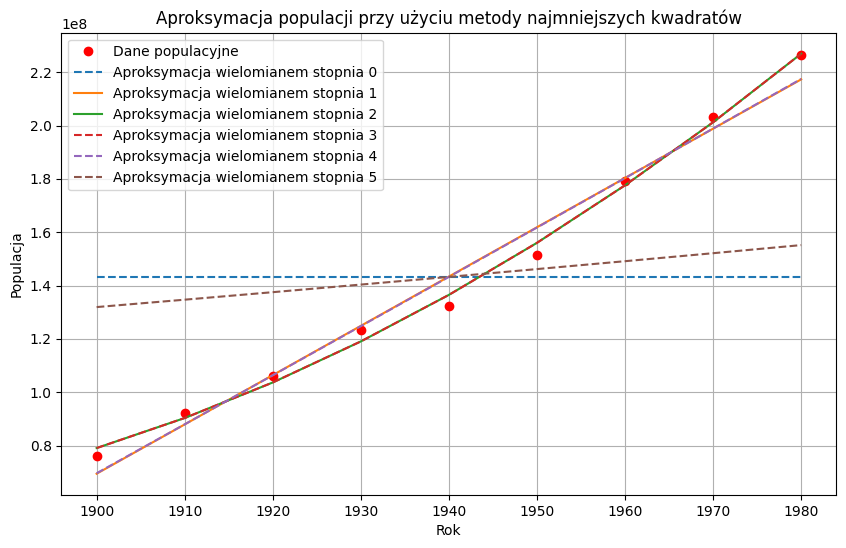

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(years, population, 'ro', label='Dane populacyjne')
for m in m_values:
    if m == 6: break
    elif m != 1 and m != 2:
        plt.plot(years, y_values[m], label='Aproksymacja wielomianem stopnia {}'.format(m), linestyle='--')

    else:
        plt.plot(years, y_values[m], label='Aproksymacja wielomianem stopnia {}'.format(m))
plt.xlabel('Rok')
plt.ylabel('Populacja')
plt.title('Aproksymacja populacji przy użyciu metody najmniejszych kwadratów')
plt.legend()
plt.grid(True)
plt.show()

Za równo za małe wartości m jak i za wysokie prowadzą do bardzo niedokładnych funkcji. Zbyt niski stopień wielomianu oznacza, że model nie jest w stanie uwzględnić zmienności danych . Zbyt wysoki stopień wielomianu oznacza z kolei, że model uwzględnia szum lub błędy danych.

Wykres z uwzględnieniem m = 6

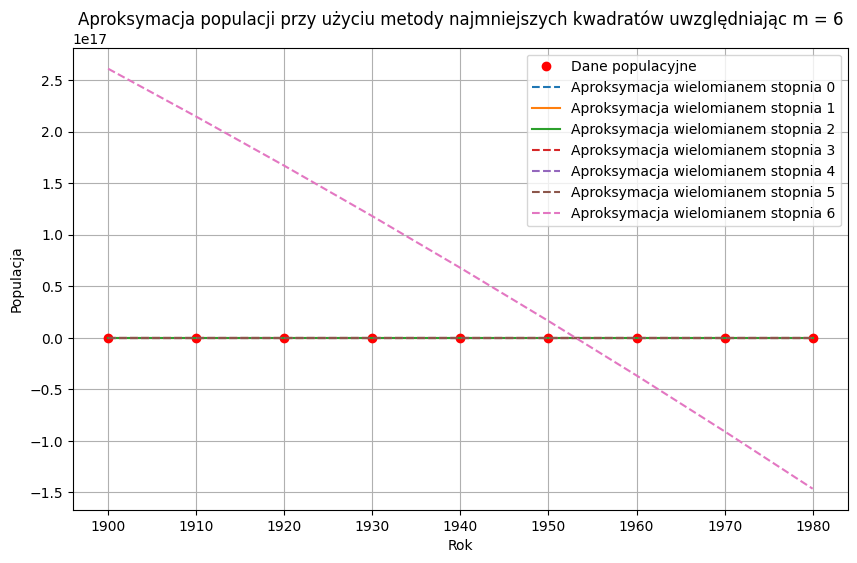

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(years, population, 'ro', label='Dane populacyjne')
for m in m_values:
    if m != 1 and m != 2:
        plt.plot(years, y_values[m], label='Aproksymacja wielomianem stopnia {}'.format(m), linestyle='--')

    else:
        plt.plot(years, y_values[m], label='Aproksymacja wielomianem stopnia {}'.format(m))
plt.xlabel('Rok')
plt.ylabel('Populacja')
plt.title('Aproksymacja populacji przy użyciu metody najmniejszych kwadratów uwzględniając m = 6')
plt.legend()
plt.grid(True)
plt.show()



Jak widać na powyzszym wykresie aproksymacja wielomianem stopnia 6 całkowicie odbiega od oczekiwanego wyniku.

### Funkcje obliczająca AIC i AICc

In [17]:
def calculate_AIC(y, y_hat, n, k):
    residual_sum_squares = np.sum((y - y_hat) ** 2)
    AIC = 2 * k + n * np.log(residual_sum_squares / n)
    return AIC

def calculate_AICc(AIC, n, k):
    AICc = AIC + (2 * k * (k + 1)) / (n - k - 1)
    return AICc


### Obliczanie optymalnego stopnia wielomianu

In [18]:
# Wartości początkowe
n = len(years)
AICc_min = np.inf
AIC_min = np.inf
best_m_AICc = None
best_m_AIC = None
AIC_tab = []
AICc_tab = []


for m in m_values: 
    k = m + 1 
    y_hat =[p(coefficients[m], year) for year in years]
    AIC = calculate_AIC(population, y_hat, n, k)
    AICc = calculate_AICc(AIC, n, k)
    AIC_tab.append(AIC)
    AICc_tab.append(AICc)
    if AIC < AIC_min:
        AIC_min = AIC
        best_m_AIC = m
    if AICc < AICc_min:
        AICc_min = AICc
        best_m_AICc = m

min_error = min(relative_error_1990)
best_m_a = 0
for m in m_values:
    if relative_error_1990[m] == min_error:
        best_m_a = m
        break

print("wartości AIC: ", AIC_tab)
print("wartości AICc:", AICc_tab)
print("Optymalny stopień wielomianu wyznaczony w pkt a:", best_m_a)
print("Optymalny stopień wielomianu wyznaczony za pomocą AICc:", best_m_AICc)
print("Optymalny stopień wielomianu wyznaczony za pomocą AIC:", best_m_AIC)
print("Wartość AIC dla optymalnego stopnia:", AIC_min)
print("Wartość AICc dla optymalnego stopnia:", AICc_min)


wartości AIC:  [320.43954648177055, 287.0564781232788, 274.65337389660255, 276.65215941875783, 292.79324118830635, 327.426402321866, 725.3966361257599]
wartości AICc: [321.0109750531991, 289.0564781232788, 279.45337389660256, 286.65215941875783, 312.79324118830635, 369.426402321866, 837.3966361257599]
Optymalny stopień wielomianu wyznaczony w pkt a: 2
Optymalny stopień wielomianu wyznaczony za pomocą AICc: 2
Optymalny stopień wielomianu wyznaczony za pomocą AIC: 2
Wartość AIC dla optymalnego stopnia: 274.65337389660255
Wartość AICc dla optymalnego stopnia: 279.45337389660256


## Wnioski
Wartość błędu względnego ekstrapolacji dla roku 1990 różniła się w zależności od stopnia wielomianu. W przypadku tego konkretnego zbioru danych, większy stopień wielomianu nie zawsze prowadził do lepszej ekstrapolacji.
Błąd względny był najmniejszy dla n równego 2, więc ekstrapolacja wielomianu do 1990 roku była najdokładnieksza dla m = 2. Kryterium informacyjne Akaikego równiez wskazało, ze optymalnym stopniem wielomianu jest m = 2. Zgadza się to rowniez z wartoscia wskazana przez kryterium w którym uwzględniliśmy składnik korygujący. 

# Zadanie 2

Wykonaj aproksymację średniokwadratową ciągłą funkcji $ f(x) = \sqrt{2} $ w przedziale [0,2] wielomianem drugiego stopnia, używając wielomianów Czebyszewa. Aproksymacja ta jest tańszym obliczeniowo zamiennikiem aproksymacji jednostajnej.

## Rozwiązanie

### Biblioteki

In [19]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

### Funkcja do aproksymacji po przeskalowaniu do odpowiedniej dziedziny [0,2] 


In [20]:
def rescale(x):
    return (x + 1)

def f_rescaled(x):
    return np.sqrt(rescale(x))

def weight_function(x):
    return (1 - x**2)**(-1/2)

### Obliczanie wyrazów wolnych z uzyciem wielomianu Czebyszewa
![image.png](./img/image.png)
![image.png](./img/image2.png)

In [21]:
def chebyshev_coefficient(f, n):
    integrand = lambda x: f(x) * np.cos(n * np.arccos(x)) * weight_function(x)
    coefficient = (2 / np.pi) * quad(integrand, -1, 1)[0] if n > 0 else (1 / np.pi) * quad(integrand, -1, 1)[0]
    return coefficient

c0 = chebyshev_coefficient(f_rescaled, 0)
c1 = chebyshev_coefficient(f_rescaled, 1)
c2 = chebyshev_coefficient(f_rescaled, 2)

print(c0,c1,c2)

0.9003163161571007 0.600210877437882 -0.12004217548769489


### Obliczanie wartości wielomianu aproksymacyjnego w przedziale [0, 2]

In [22]:
def approximated_function(x):
    return c0 +c1 * np.cos(np.arccos(x)) + c2 * np.cos(2 * np.arccos(x))

## Wykres

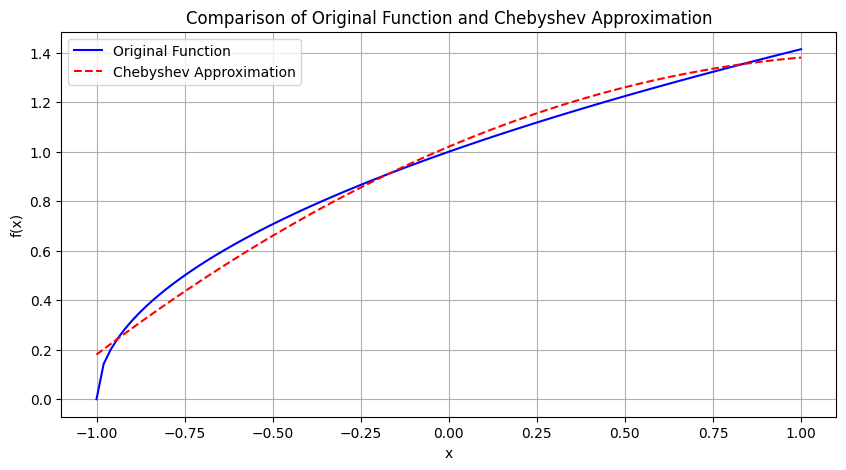

In [23]:
x_values = np.linspace(-1, 1, 100)
y_true = f_rescaled(x_values)
y_approx = approximated_function(x_values)

plt.figure(figsize=(10, 5))
plt.plot(x_values, y_true, label='Original Function', color='blue')
plt.plot(x_values, y_approx, label='Chebyshev Approximation', color='red', linestyle='--')
plt.title('Comparison of Original Function and Chebyshev Approximation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

## Wnioski

Metoda aproksymacji średniokwadratowej, w tym przypadku z wykorzystaniem wielomianów Czebyszewa, jest użytecznym narzędziem do przybliżania funkcji w przypadkach, gdy znane są tylko wartości funkcji w określonych punktach. Wielomian aproksymacyjny może być używany do analizy i przewidywania zachowania funkcji w obszarach, gdzie nie są dostępne dokładne dane, ale można je przybliżyć na podstawie znanych wartości węzłów interpolacji.

### Bibliografia

http://home.agh.edu.pl/~funika/mownit/lab3/aproksymacja.pdf

Metody Obliczeniowe w Nauce i Technice 5. Aproksymacja Marian Bubak, Katarzyna Rycerz

prezentacja Approximation Marcin Kuta